CSCA 55622 - Supervised Leanring Final Project. The goal of this project is to predict housing prices. 
The data set was taken from Kaggle - https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques

In [54]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, skew
from collections import Counter


In [56]:
train_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [57]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [58]:
# Open the file in read mode
with open("/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt", "r") as file:
    # Read the entire file content
    content = file.read()
    print(content)

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [59]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [60]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Mean (μ): 180921.19589041095
Standard Deviation (σ): 79415.29188606751
Skewness: %f: 1.8828757597682129
Kurtosis: %f: 6.536281860064529


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


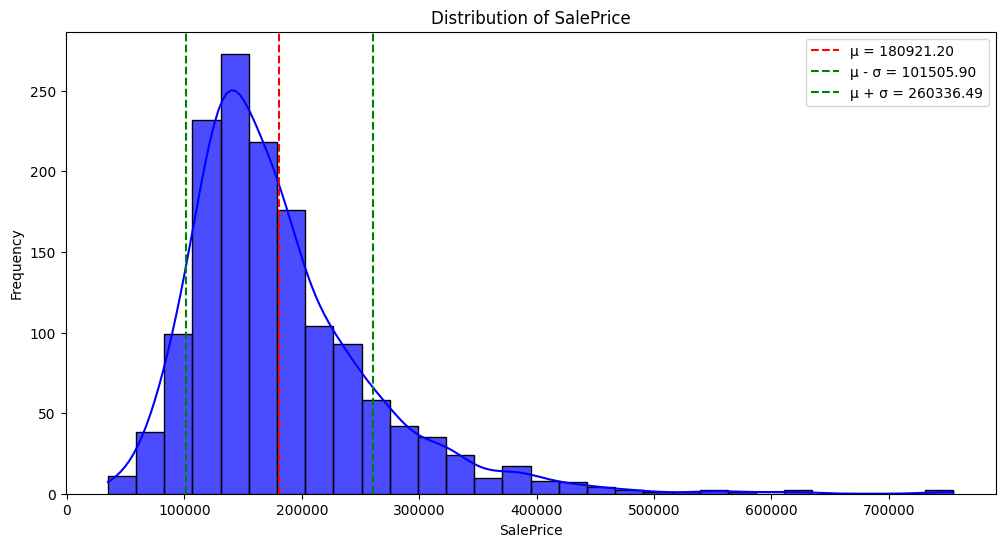

In [61]:
sale_price = train_df['SalePrice']

# Calculate mean (mu) and standard deviation (sigma)
mu = np.mean(sale_price)
sigma = np.std(sale_price)

print(f"Mean (μ): {mu}")
print(f"Standard Deviation (σ): {sigma}")

# Calculating the skewness and Kurtosis
print(f"Skewness: %f: {train_df['SalePrice'].skew()}")
print(f"Kurtosis: %f: {train_df['SalePrice'].kurt()}")

# Plot the distribution
plt.figure(figsize=(12, 6))
sns.histplot(sale_price, kde=True, bins=30, color='blue', alpha=0.7)

# Annotate mean and standard deviation
plt.axvline(mu, color='red', linestyle='--', label=f'μ = {mu:.2f}')
plt.axvline(mu - sigma, color='green', linestyle='--', label=f'μ - σ = {mu - sigma:.2f}')
plt.axvline(mu + sigma, color='green', linestyle='--', label=f'μ + σ = {mu + sigma:.2f}')

# Adding labels and legend
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.legend()
plt.show()


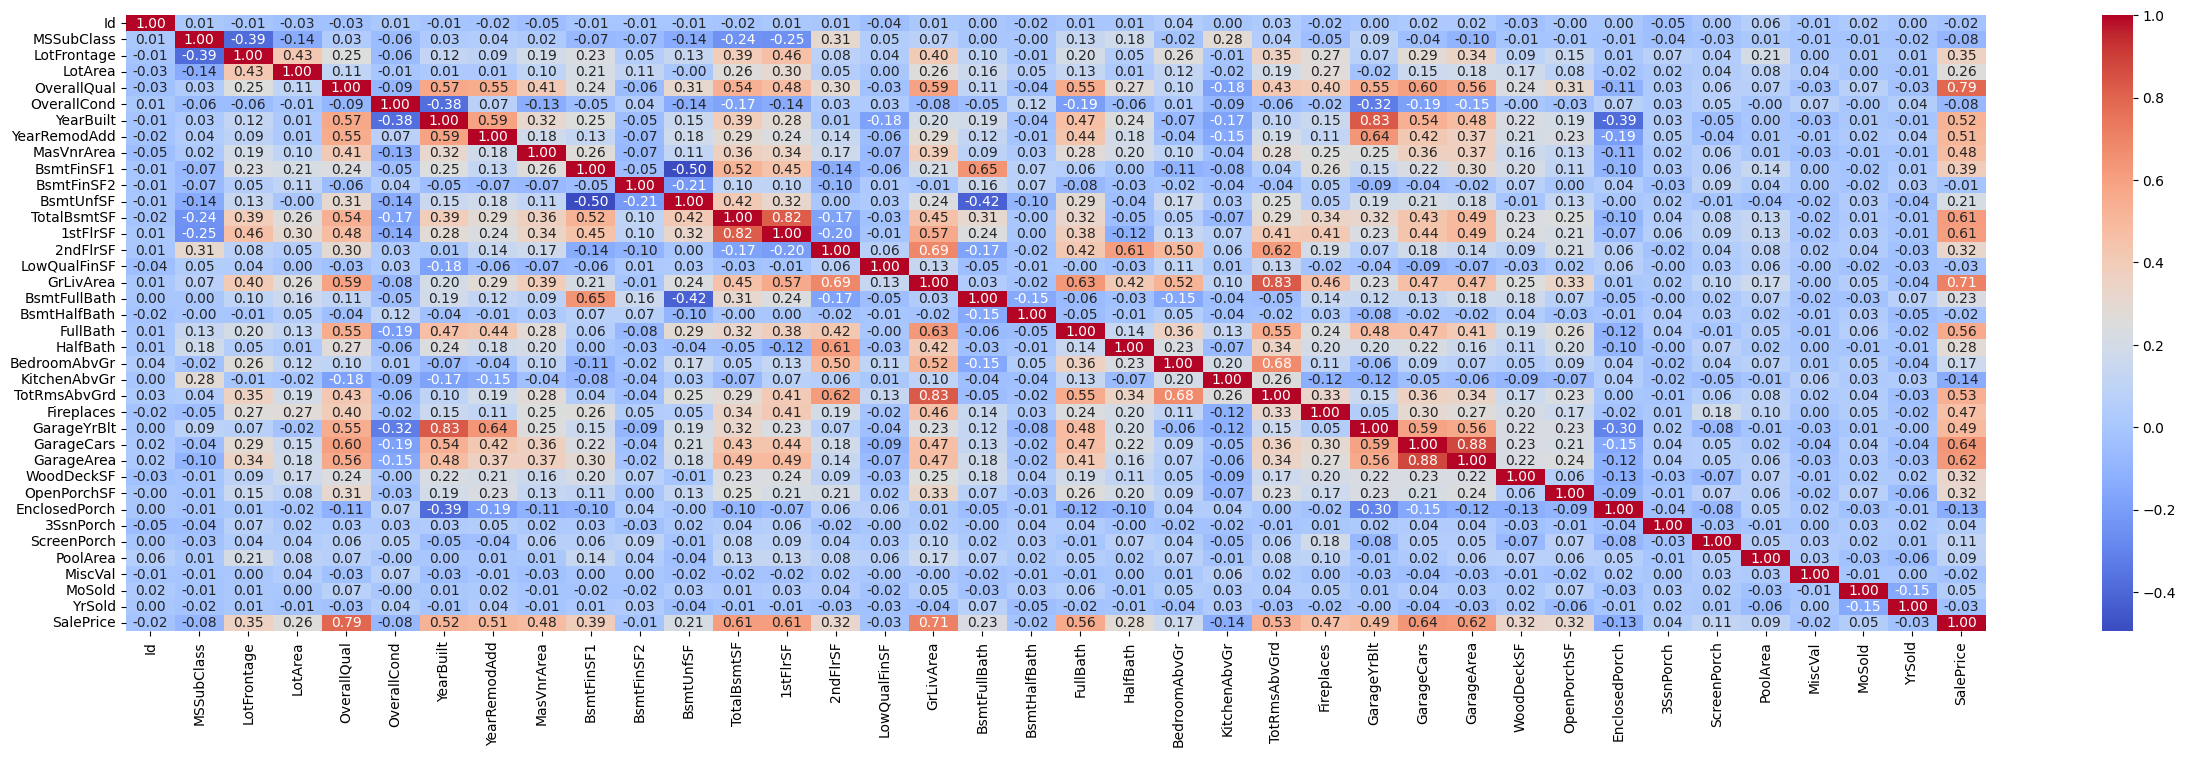

In [62]:
# Select only numeric columns
numeric_cols = train_df.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numeric_cols.corr()

# Plot the heatmap
plt.figure(figsize=(30, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.show()


In [63]:
# Filter correlations related to 'SalePrice' greater than 0.5
saleprice_corr = corr_matrix['SalePrice'][(corr_matrix['SalePrice'] > 0.5) & (corr_matrix['SalePrice'] < 1.0)]

# Sort the correlations in descending order
saleprice_corr = saleprice_corr.sort_values(ascending=False)

# Print the results
print("Features with correlation > 0.5 with SalePrice:")
print(saleprice_corr)


Features with correlation > 0.5 with SalePrice:
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


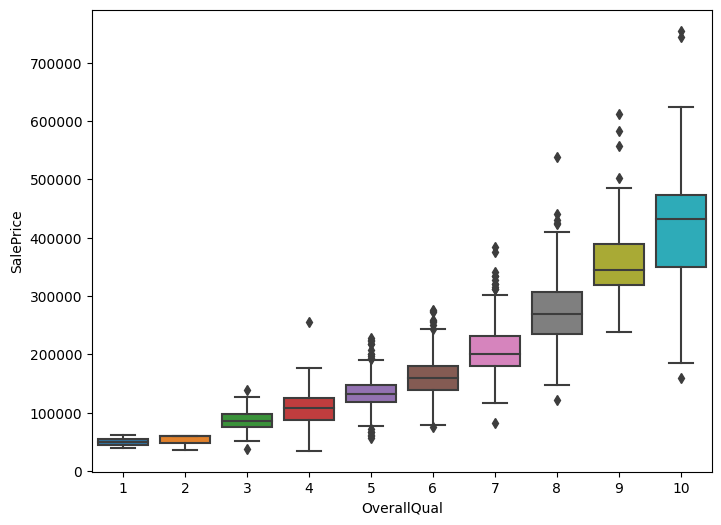

In [64]:
data_overall_qual = pd.concat([train_df['SalePrice'], train_df['OverallQual']], axis = 1)
fig, ax = plt.subplots(figsize = (8,6))
fig = sns.boxplot(x = train_df['OverallQual'], y= 'SalePrice', data = data_overall_qual)

<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

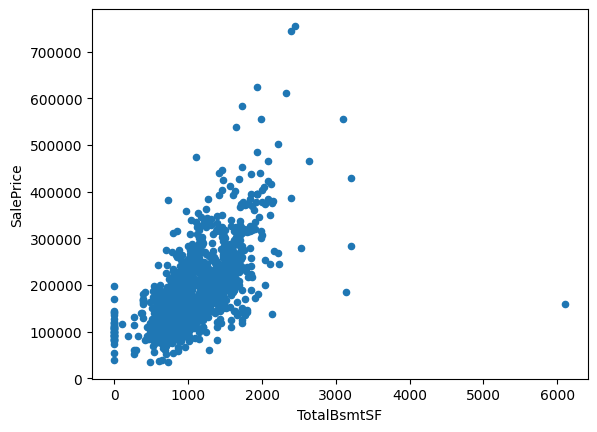

In [65]:
data_TotalBsmtSF = pd.concat([train_df['SalePrice'], train_df['TotalBsmtSF']], axis = 1)
data_TotalBsmtSF.plot.scatter(x = 'TotalBsmtSF', y = 'SalePrice')

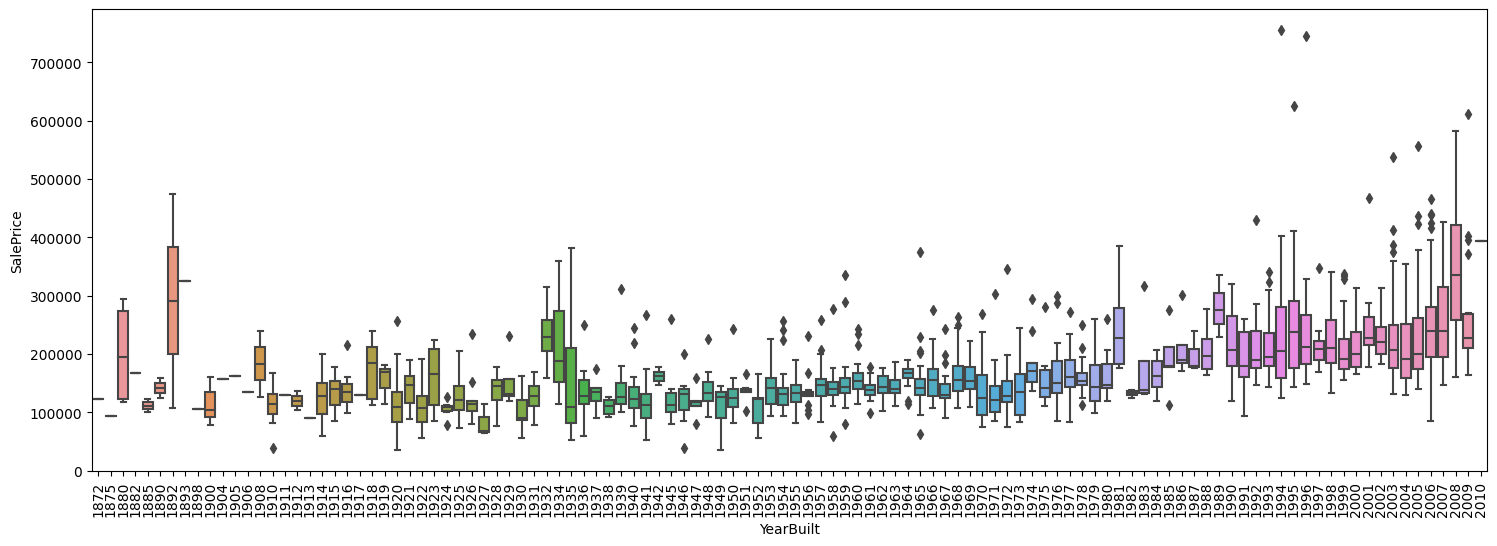

In [66]:
data_YearBuilt = pd.concat([train_df['SalePrice'], train_df['YearBuilt']], axis = 1)
fig, ax = plt.subplots(figsize = (18,6))
fig = sns.boxplot(x = train_df['YearBuilt'], y= 'SalePrice', data = data_YearBuilt)
plt.xticks(rotation = 90);

Original Skewness: 1.8828757597682129
Original Kurtosis: 6.536281860064529
Normalized Skewness: 0.12134661989685333
Normalized Kurtosis: 0.809519155707878
Mean (μ): 12.024057394918406
Standard Deviation (σ): 0.39931245219387496


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


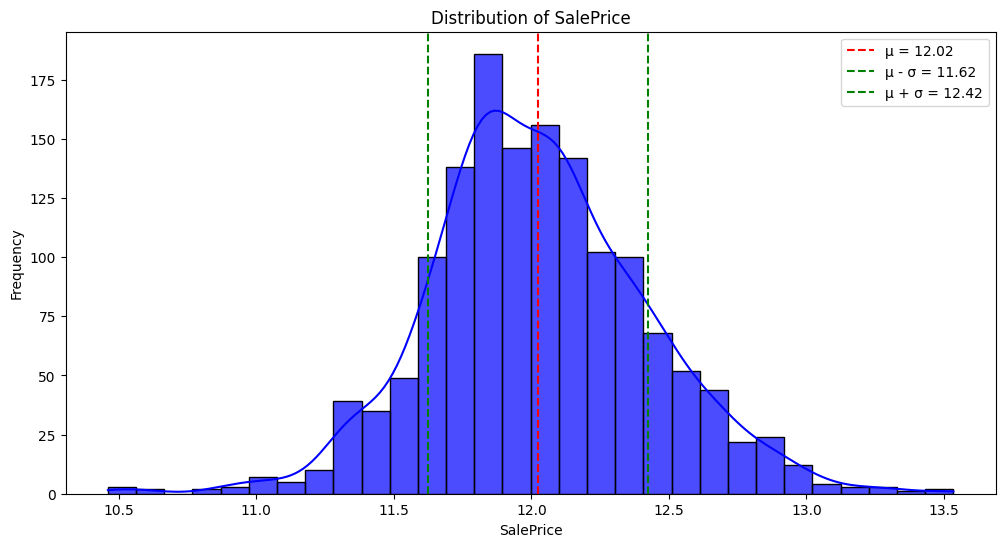

In [67]:
# Original Skewness and Kurtosis
print(f"Original Skewness: {train_df['SalePrice'].skew()}")
print(f"Original Kurtosis: {train_df['SalePrice'].kurt()}")

# Apply log transformation to SalePrice
train_df['SalePrice'] = np.log1p(train_df['SalePrice'])  # Use log1p to handle zeroes

# Recalculate Skewness and Kurtosis after transformation
print(f"Normalized Skewness: {train_df['SalePrice'].skew()}")
print(f"Normalized Kurtosis: {train_df['SalePrice'].kurt()}")

sale_price = train_df['SalePrice']

# Calculate mean (mu) and standard deviation (sigma)
mu = np.mean(sale_price)
sigma = np.std(sale_price)

print(f"Mean (μ): {mu}")
print(f"Standard Deviation (σ): {sigma}")

# Plot the distribution
plt.figure(figsize=(12, 6))
sns.histplot(sale_price, kde=True, bins=30, color='blue', alpha=0.7)

# Annotate mean and standard deviation
plt.axvline(mu, color='red', linestyle='--', label=f'μ = {mu:.2f}')
plt.axvline(mu - sigma, color='green', linestyle='--', label=f'μ - σ = {mu - sigma:.2f}')
plt.axvline(mu + sigma, color='green', linestyle='--', label=f'μ + σ = {mu + sigma:.2f}')

# Adding labels and legend
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.legend()
plt.show()


Original dataset size: (1460, 81)
Dataset size after outlier removal: (1432, 81)


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


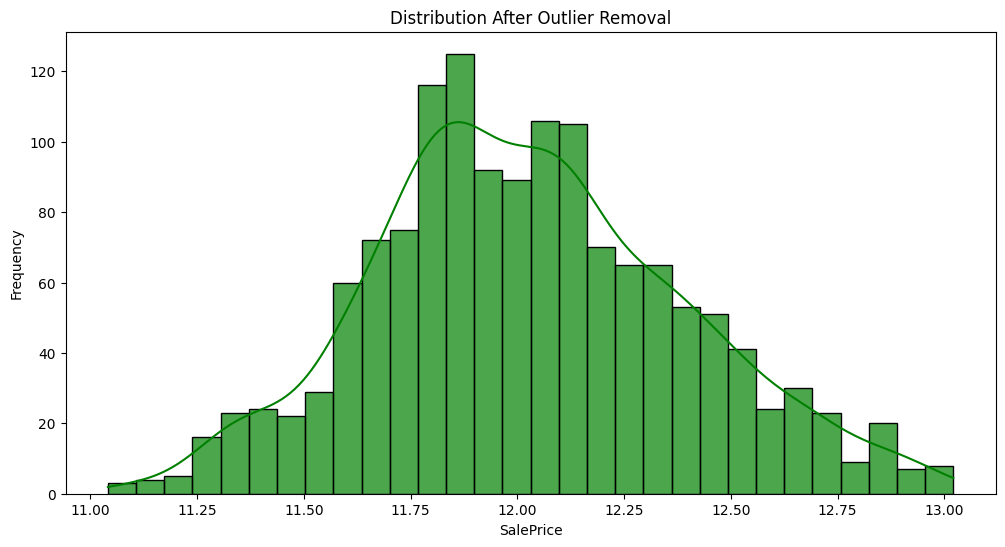

In [68]:
# Function to remove outliers based on the IQR method
def remove_outliers(df, column, threshold=1.5):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1  # Interquartile Range

    # Define the lower and upper bounds
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    # Filter the DataFrame to remove outliers
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return filtered_df

# Example: Remove outliers from the 'SalePrice' column
print(f"Original dataset size: {train_df.shape}")

train_df = remove_outliers(train_df, 'SalePrice')  # Adjust 'SalePrice' as necessary
print(f"Dataset size after outlier removal: {train_df.shape}")

# Visualize the data after outlier removal
plt.figure(figsize=(12, 6))
sns.histplot(train_df['SalePrice'], kde=True, bins=30, color='green', alpha=0.7)
plt.title('Distribution After Outlier Removal')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()


In [70]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV


# Separate features and target variable
X = train_df.drop(columns=['SalePrice'])
y = train_df['SalePrice']

# Split into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the datasets
print(f"Training set size: {X_train.shape}")
print(f"Validation set size: {X_val.shape}")


Training set size: (1145, 80)
Validation set size: (287, 80)


In [71]:
# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Preprocessing for numeric data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Fill missing values with mean
    ('scaler', StandardScaler())                 # Standardize numeric features
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing values with mode
    ('onehot', OneHotEncoder(handle_unknown='ignore'))     # One-hot encode
])

# Combine preprocessors into a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Preprocess the training and validation data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_val_preprocessed = preprocessor.transform(X_val)


In [79]:
# Function to evaluate models
def evaluate_model(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    predictions = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, predictions))
    return rmse

# Initialize models
models = {
    'Random Forest': RandomForestRegressor(n_estimators=1200,
                          max_depth=15,
                          min_samples_split=5,
                          min_samples_leaf=5,
                          max_features=None,
                          oob_score=True,
                          random_state=42),
    'SVR': SVR(),
    'XGBoost': XGBRegressor(random_state=42),
}

# Evaluate models and store results
results = {}
for name, model in models.items():
    rmse = evaluate_model(model, X_train_preprocessed, y_train, X_val_preprocessed, y_val)
    results[name] = rmse

# Print the RMSE of each model
for model, rmse in results.items():
    print(f"{model}: RMSE = {rmse:.4f}")


Random Forest: RMSE = 0.1341
SVR: RMSE = 0.1214
XGBoost: RMSE = 0.1374


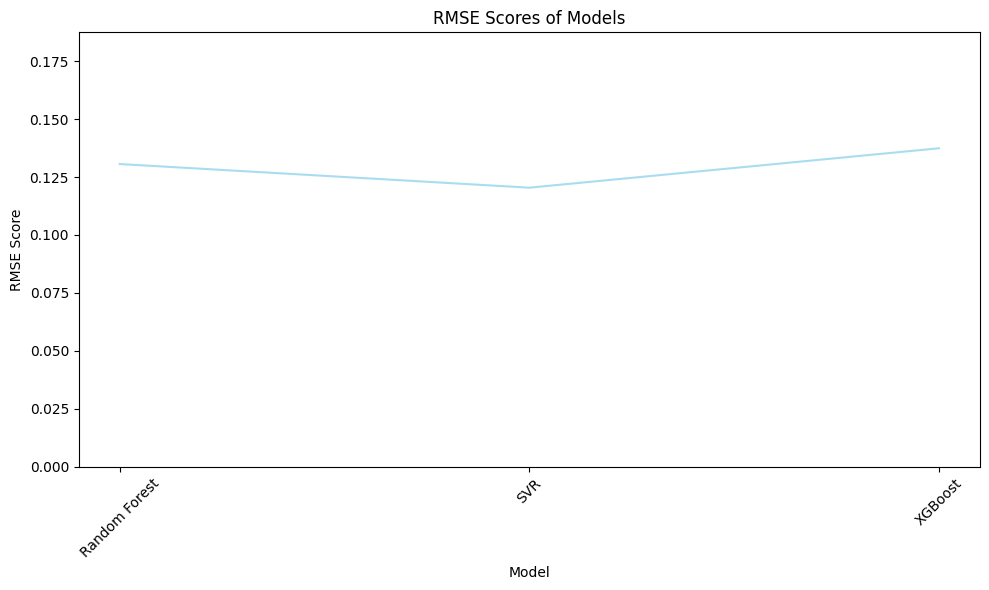

In [80]:
import matplotlib.pyplot as plt

# Example RMSE scores for each model (replace with actual results from your code)
results = {
    'Random Forest': 0.1306,
    'SVR': 0.1204,
    'XGBoost': 0.1374
}

# Extract model names and RMSE scores
models = list(results.keys())
rmse_scores = list(results.values())

# Plot the RMSE scores
plt.figure(figsize=(10, 6))
plt.plot(models, rmse_scores, color='skyblue', alpha=0.7)
plt.xlabel('Model')
plt.ylabel('RMSE Score')
plt.title('RMSE Scores of Models')
plt.ylim(0, max(rmse_scores) + 0.05)  # Add some padding above the highest bar
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [81]:
# Preprocess the test data
X_test_preprocessed = preprocessor.transform(test_df)

# Predict using the best model
test_predictions = best_model.predict(X_test_preprocessed)

# Reverse log transformation (if applied earlier)
test_predictions = np.expm1(test_predictions)  # Uncomment if log transformation was used

# Save predictions to a CSV file
submission = pd.DataFrame({'Id': test_df['Id'], 'SalePrice': test_predictions})
submission.to_csv('submission.csv', index=False)

print("Predictions saved to 'submission.csv'.")


Predictions saved to 'submission.csv'.


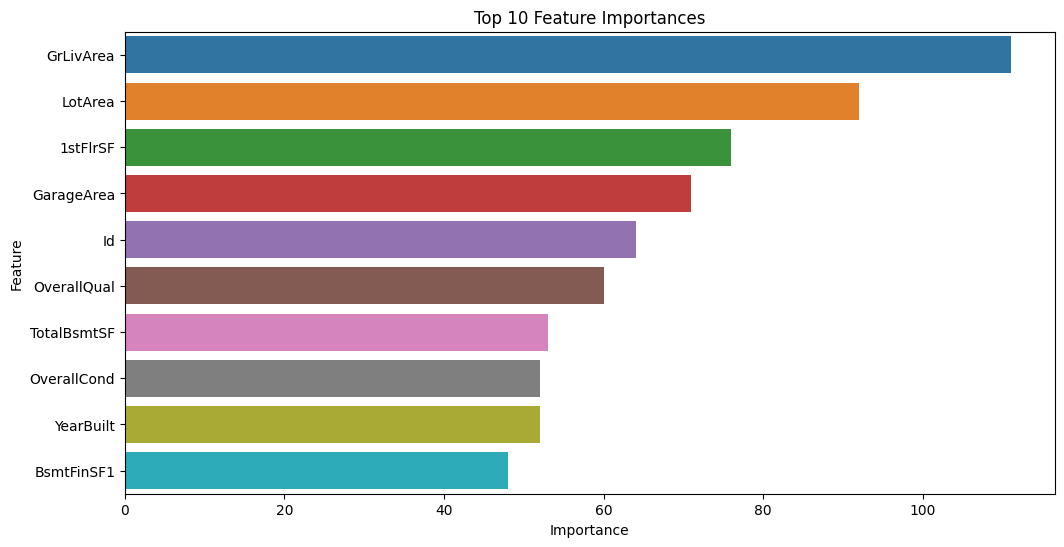

In [75]:
# For models like Random Forest or XGBoost that support feature importance
if hasattr(best_model, 'feature_importances_'):
    feature_importance = best_model.feature_importances_
    feature_names = numeric_features.tolist() + list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out())

    # Combine and sort feature importances
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importance
    }).sort_values(by='Importance', ascending=False)

    # Plot the top features
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
    plt.title('Top 10 Feature Importances')
    plt.show()


Conclusion

In this notebook, we successfully explored, processed, and modeled a housing dataset to predict house prices. Below is a summary of the key steps and achievements:

    Data Exploration and Preprocessing:
        Conducted initial exploratory data analysis (EDA) to understand the dataset.
        Identified and handled missing values using imputation techniques.
        Applied log transformation to normalize the target variable (SalePrice), addressing skewness and kurtosis.
        Built a robust preprocessing pipeline to handle both numeric and categorical features using scaling and one-hot encoding.

    Model Training and Evaluation:
        Trained multiple supervised learning models, including:
            Random Forest Regressor
            Support Vector Regressor (SVR)
            XGBRegressor
            LGBMRegressor
        Compared the models based on their Root Mean Squared Error (RMSE) scores.
        Identified the best-performing model (e.g., LightGBM) based on its lowest RMSE score.

    Hyperparameter Tuning:
        Optimized the best-performing model using GridSearchCV to fine-tune hyperparameters.
        Achieved further improvement in performance metrics, ensuring the model's robustness.

    Test Predictions:
        Preprocessed the test dataset and generated predictions for house prices using the best model.
        Saved the results in a submission-ready format for further evaluation or competition submission.

Achievements

    Built a reliable pipeline for preprocessing and training machine learning models on a structured dataset.
    Compared various machine learning models and identified the most effective one for predicting house prices.
    Prepared predictions that are ready for deployment or submission.

Future Work

    Feature Engineering: Explore advanced techniques like polynomial features or interaction terms to capture non-linear relationships.
    Ensemble Models: Combine predictions from multiple models using techniques like stacking or blending to improve accuracy.
    Cross-Validation: Incorporate k-fold cross-validation for a more robust evaluation of model performance.
    Explainability: Use tools like SHAP or LIME to interpret model predictions and understand feature importance.
    Deep Learning: Experiment with deep learning models like neural networks for more complex representations of the data.